In [1]:
import pandas as pd
import json
import sklearn.svm as svm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.neural_network import MLPClassifier
import script as sc
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
## Change the name to get your path
user = 'Andrew'

## Build test and train Datasets

In [3]:
# Rebuild complete dataset if necessary
sc.update_complete(user)

C:\Users\Andrew\Documents\CalPoly\DataCapstone\KineseItUp\script.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  observedData['index'] = range(len(observedData))


In [3]:
data = pd.DataFrame(sc.get_complete(user))

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,X1,X2,X3,X4,X5,X6,X7,X8,...,X238,X239,X240,X241,Unnamed: 0.2,observation,date,activity,coding,time
0,0,1.0,2017-10-06 16:44:00,-0.191,-0.711,-0.660,-0.172,-0.715,-0.652,-0.207,...,-0.648,-0.281,-0.730,-0.648,1.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,0.0
1,1,2.0,2017-10-06 16:44:01,-0.254,-0.715,-0.645,-0.266,-0.727,-0.637,-0.289,...,-0.711,0.035,-0.707,-0.715,2.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,1.0
2,2,3.0,2017-10-06 16:44:02,0.063,-0.715,-0.719,0.129,-0.695,-0.719,0.164,...,-0.301,-0.828,0.180,-0.316,3.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,2.0
3,3,4.0,2017-10-06 16:44:03,-0.773,0.180,-0.305,-0.754,0.219,-0.285,-0.777,...,-0.160,-1.039,0.332,-0.156,4.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,3.0
4,4,5.0,2017-10-06 16:44:04,-1.031,0.332,-0.160,-1.016,0.344,-0.164,-1.016,...,0.105,-0.570,0.605,0.133,5.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,4.0
5,5,6.0,2017-10-06 16:44:05,-0.602,0.621,0.125,-0.605,0.617,0.070,-0.621,...,-0.133,-0.609,0.918,-0.191,6.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,5.0
6,6,7.0,2017-10-06 16:44:06,-0.602,0.891,-0.195,-0.512,0.914,-0.191,-0.441,...,0.613,-0.680,0.727,0.598,7.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,6.0
7,7,8.0,2017-10-06 16:44:07,-0.680,0.719,0.586,-0.672,0.711,0.586,-0.648,...,0.473,-0.867,0.359,0.434,8.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,7.0
8,8,9.0,2017-10-06 16:44:08,-0.895,0.363,0.422,-0.898,0.379,0.426,-0.879,...,0.465,-0.875,0.398,0.445,9.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,8.0
9,9,10.0,2017-10-06 16:44:09,-0.859,0.391,0.441,-0.848,0.395,0.441,-0.848,...,0.418,-0.801,0.496,0.422,10.0,H_AM01DO1_M,13-01-2018,active,non-sedentary,9.0


In [4]:
data = data.sample(frac=1)

In [4]:
X = data.iloc[:, [i for i in range(3, 243)]]
criterion = data.iloc[:, [246]]

In [5]:
## creating variables for x, y, z variables## crea 
x = []
y = []
z = []
for i in range(2,242,3):
    
    x.append('X' + str(i))
    y.append('X' + str(i+1))
    z.append('X' + str(i+2))

three_dim_data = np.array([np.array(X[x]),np.array(X[y]),np.array(X[z])])

In [6]:
transpose_data = three_dim_data.transpose()
transpose_data = transpose_data.reshape(100405, 80, 3)

In [7]:
def get_vm(x):
    return np.linalg.norm(x)

vvm = np.vectorize(get_vm)

In [8]:
mat = []

for row in transpose_data:
    vms = []
    for point in row:
        vms.append(np.linalg.norm(point))
    mat.append(vms)    

KeyboardInterrupt: 

In [10]:
def curry_norm(x):
    return pd.Series(np.apply_along_axis(np.linalg.norm, 1, x))

In [11]:
vm_data = pd.DataFrame([curry_norm(transpose_data[0])])

In [12]:
for row in transpose_data[1:]:
    vm_data = vm_data.append(curry_norm(row), ignore_index=True)

In [14]:
vm_data.to_csv("vector_magnitudes.csv")

In [5]:
vm_data = pd.read_csv('vector_magnitudes.csv')

In [6]:
vm_data = vm_data.iloc[:,1:]

In [7]:
vm_data_crit = pd.concat([vm_data, criterion], axis = 1)

## KNN With DTW

In [8]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from fastdtw import *

In [9]:
def get_fastdtw(x, y):
    return fastdtw(x, y)[0]

In [10]:
vm_data_crit['activity'] = criterion

In [11]:
vm_data_crit = vm_data_crit.sample(frac=1)

vm_criterion = vm_data_crit['activity'].copy()

vm_criterion[vm_data_crit['activity'] != 'active'] = 0
vm_criterion[vm_data_crit['activity'] == 'active'] = 1

In [14]:
vm_criterion.unique()

array([1, 0], dtype=object)

In [12]:
n = int(0.75 * len(data))

trainX = vm_data_crit.iloc[:n, :80]
testX = vm_data_crit.iloc[n:, :80]

trainY = vm_criterion[:n].values.reshape(n,).astype('float')
testY = vm_criterion[n:].values.reshape((len(data) -n),).astype('float')

In [16]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5])
distance, path = fastdtw(x, y)
print(distance)

1.0


In [13]:
dtw = KNeighborsClassifier(n_neighbors = 10, metric=get_fastdtw)

In [ ]:
dtw.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function get_fastdtw at 0x000001D579A44F28>,
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
dtw_results = dtw.predict(testX)
dtw_results.to_csv("dtw_results.csv")

In [ ]:
dtw_results

## Angle Cut Point Method

In [25]:
## create the cut point
def cut_point_classify(angle):
    if angle > -15 and angle < 15:
        return 'sedentary'
    else:
        return 'non-sedentary'

In [67]:
## use the cut point
pred = data['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(pred == data['coding'])

0.51798949632894087

In [71]:
## use the cut point
predH = dataH['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predH == dataH['coding'])

0.74814402375649591

In [72]:
## use the cut point
predE = dataE['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predE == dataE['coding'])

0.61997719655875339

In [74]:
## use the cut point
predL = dataL['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predL == dataL['coding'])

0.2467454528667713

In [73]:
## use the cut point
predA = dataA['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predA == dataA['coding'])

0.61755601755601752

In [75]:
## use the cut point
predW = dataW['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predW == dataW['coding'])

0.31853438020461577

## SVM

In [9]:
clf = svm.SVC(cache_size=7000)

In [10]:
clf.fit(trainX,trainY)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.score(testXH,testYH)

0.76466221232368226

In [11]:
clf.score(testXE,testYE)

0.66155334438916524

In [12]:
clf.score(testXL,testYL)

0.57034711964549478

In [13]:
clf.score(testXA,testYA)

0.81892091648189214

In [14]:
clf.score(testXW,testYW)

0.59935287400076132

In [11]:
clf.score(testX,testY)

0.7117851473679695

In [12]:
confusion_matrix(testY, clf.predict(testX))

array([[    0,   160,     0,     0,     3,    14,     0],
       [    0, 10571,     0,    89,   216,   855,     3],
       [    0,    98,     0,     2,     4,     3,     0],
       [    0,   196,     0,  1080,    64,   103,     0],
       [    0,   492,     0,   103,  1830,   322,     2],
       [    0,  1693,     0,   176,   358,  2953,    25],
       [    0,  1424,     0,     9,    94,   210,   157]], dtype=int64)

## Neural Network

In [11]:
n_net = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000, 500, 250, 125), 
                      random_state=1, verbose = True)
n_net.fit(trainX,trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 500, 250, 125), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [28]:
np.sum(n_net.predict(testXH) == testYH) / len(testXH)

0.67427616926503342

In [30]:
np.sum(n_net.predict(testXE) == testYE) / len(testXE)

0.57144831398562745

In [32]:
np.sum(n_net.predict(testXL) == testYL) / len(testXL)

0.18537666174298376

In [33]:
np.sum(n_net.predict(testXA) == testYA) / len(testXA)

0.69401330376940129

In [35]:
np.sum(n_net.predict(testXW) == testYW) / len(testXW)

0.36676817662733158

In [18]:
predictedVals = n_net.predict(testX)
n_net.score(testX,testY)
# f1_score(testY, predictedVals)

0.73638738895662781

In [21]:
conf_mat = confusion_matrix(testY,predictedVals,testY.unique())

In [37]:
f1_score(testY,predictedVals,average='weighted')

C:\Users\Hans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.70974126423006312

In [27]:
for i in range(7):
    print (conf_mat[i][i] / np.sum(conf_mat[i]),testY.unique()[i])

0.918856356356 active
0.574349775785 sitting still
0.127197039778 sitting with upper body movement
0.737987987988 lying
0.592735933313 sitting and typing
0.0 kneeling
0.0 Private / Not Coded


In [22]:
conf_mat,testY.unique()

(array([[14687,   967,    64,    68,   198,     0,     0],
        [ 1773,  3202,    66,   161,   373,     0,     0],
        [ 1449,   305,   275,    48,    85,     0,     0],
        [  176,   123,     5,   983,    45,     0,     0],
        [  613,   648,    26,    81,  1991,     0,     0],
        [  109,     2,     1,     1,     3,     0,     0],
        [  165,    11,     0,     0,     1,     0,     0]], dtype=int64),
 array(['active', 'sitting still', 'sitting with upper body movement',
        'lying', 'sitting and typing', 'kneeling', 'Private / Not Coded'], dtype=object))

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
rf.score(testXH,testYH)

0.7548255382331106

In [18]:
rf.score(testXE,testYE)

0.66680486456605859

In [19]:
rf.score(testXL,testYL)

0.34490398818316098

In [20]:
rf.score(testXA,testYA)

0.7889874353288987

In [21]:
rf.score(testXW,testYW)

0.59326227636086792

In [14]:
rf.score(testX,testY)

0.67222961087991762

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [24]:
knn.score(testXH,testYH)

0.75668151447661469

In [25]:
knn.score(testXE,testYE)

0.65823659480375896

In [26]:
knn.score(testXL,testYL)

0.61983013293943867

In [27]:
knn.score(testXA,testYA)

0.81596452328159641

In [28]:
knn.score(testXW,testYW)

0.57689379520365436

In [21]:
knn.score(testX,testY)

0.72671500278862244

In [17]:
## determining the optimal k value
acc = []
for i in range(5,100,5):
    neigh = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
    neigh.fit(trainX,trainY)
    acc.append([i,neigh.score(testX,testY)])
acc = np.array(acc)

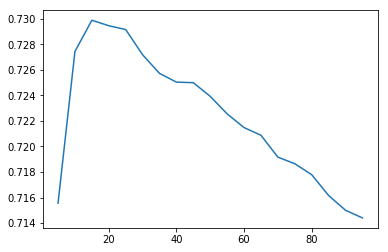

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc[:,0],acc[:,1])

In [31]:
conf_mat = confusion_matrix(testY, knn.predict(testX), testY.unique())

In [37]:
for i in range(7):
    print (conf_mat[i][i] / np.sum(conf_mat[i]),testY.unique()[i])

0.744634412514 sitting and typing
0.889722174876 active
0.584822286263 sitting still
0.164202745512 sitting with upper body movement
0.760221760222 lying
0.0 Private / Not Coded
0.0 kneeling


In [30]:
confusion_matrix(testY, knn.predict(testX), testY.unique()),testY.unique()

(array([[ 2047,   369,   275,    10,    48,     0,     0],
        [  303, 10440,   866,    50,    75,     0,     0],
        [  363,  1603,  3044,    58,   137,     0,     0],
        [  109,  1241,   209,   311,    24,     0,     0],
        [   92,   190,    63,     1,  1097,     0,     0],
        [    4,   162,    10,     1,     0,     0,     0],
        [    2,    97,     6,     0,     2,     0,     0]], dtype=int64),
 array(['sitting and typing', 'active', 'sitting still',
        'sitting with upper body movement', 'lying', 'Private / Not Coded',
        'kneeling'], dtype=object))

In [35]:
knn_dist = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_dist.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [36]:
conf_mat2 = confusion_matrix(testY, knn_dist.predict(testX), testY.unique())

In [ ]:
conf_mat2at2

In [38]:
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.748635867588 sitting and typing
0.881881711266 active
0.606916426513 sitting still
0.179514255544 sitting with upper body movement
0.767844767845 lying
0.0 Private / Not Coded
0.0 kneeling


In [39]:
knn_dist.score(testX, testY)

0.72988974215968083

In [41]:
f1_score(testY, knn_dist.predict(testX), average='weighted')

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.70753265212438199

## Boosting!

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost.fit(trainX, trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [20]:
adaboost.score(testX, testY)

0.63735037968166808

In [21]:
conf_mat2 = confusion_matrix(testY, adaboost.predict(testX), testY.unique())
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.849096258932 active
0.4316982607 sitting still
0.635669673838 lying
0.560644924881 sitting and typing
0.0519693654267 sitting with upper body movement
0.00877192982456 kneeling
0.027027027027 Private / Not Coded


In [22]:
f1_score(testY, adaboost.predict(testX), average='weighted')

0.60955350678233555

In [23]:
conf_mat2

array([[10100,   957,   102,   322,   142,   243,    29],
       [ 2064,  2209,   469,   308,    53,    12,     2],
       [  267,   159,   916,    98,     0,     1,     0],
       [  426,   500,   257,  1530,    13,     3,     0],
       [ 1275,   256,    12,   168,    95,    20,     2],
       [  107,     1,     2,     3,     0,     1,     0],
       [  153,    18,     0,     4,     1,     4,     5]], dtype=int64)

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators = 200,max_depth = 7)

In [26]:
grad_boost.fit(trainX, trainY)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
conf_mat2 = confusion_matrix(testY, grad_boost.predict(testX), testY.unique())
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.917108028583 active
0.675004885675 sitting still
0.834836918806 lying
0.78930010993 sitting and typing
0.310175054705 sitting with upper body movement
0.0 kneeling
0.00540540540541 Private / Not Coded


In [29]:
f1_score(testY, grad_boost.predict(testX), average='weighted')

0.76959799300646581

In [30]:
conf_mat2

array([[10909,   659,    37,   118,   148,    12,    12],
       [ 1326,  3454,    52,   169,   111,     2,     3],
       [  123,    89,  1203,    21,     2,     3,     0],
       [  284,   245,    27,  2154,    18,     0,     1],
       [ 1027,   181,     8,    43,   567,     2,     0],
       [  106,     5,     1,     1,     1,     0,     0],
       [  168,    13,     0,     1,     2,     0,     1]], dtype=int64)